# LeNet网络训练

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from keras import backend as K
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.optimizers import SGD
from nn.conv.lenet import LeNet

import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("[INFO] loading MNIST dataset...")
dataset = datasets.fetch_openml(name="mnist_784",
                                data_home=os.path.abspath(
                                    os.path.join(os.getcwd(),
                                                 "../imgdatasets")))
print("[INFO] load MNIST dataset done")

[INFO] loading MNIST dataset...
[INFO] load MNIST dataset done


In [3]:
print("[INFO] dataset preprocess...")
data = dataset.data
if K.image_data_format == "channels_first":
    data = data.reshape((data.shape[0], 1, 28, 28))
else:
    data = data.reshape((data.shape[0], 28, 28, 1))

data = data.astype("float") / 255.0
dataset.target.astype("int")

(trainX, testX, trainY, testY) = train_test_split(data,
                                                  dataset.target,
                                                  test_size=0.25,
                                                  random_state=42,
                                                  stratify=dataset.target)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

[INFO] dataset preprocess...


In [4]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model...


In [5]:
print("[INFO] training network...")
H = model.fit(trainX,
              trainY,
              validation_data=(testX, testY),
              batch_size=128,
              epochs=20,
              verbose=1)

[INFO] training network...
Epoch 1/20
411/411 [==============================] - 74s 180ms/step - loss: 1.1806 - accuracy: 0.6906 - val_loss: 0.5836 - val_accuracy: 0.7933
Epoch 2/20
411/411 [==============================] - 77s 187ms/step - loss: 0.3362 - accuracy: 0.9012 - val_loss: 0.3520 - val_accuracy: 0.8929
Epoch 3/20
411/411 [==============================] - 75s 182ms/step - loss: 0.2503 - accuracy: 0.9264 - val_loss: 0.3550 - val_accuracy: 0.8823
Epoch 4/20
411/411 [==============================] - 80s 195ms/step - loss: 0.2036 - accuracy: 0.9399 - val_loss: 0.2099 - val_accuracy: 0.9364
Epoch 5/20
411/411 [==============================] - 78s 190ms/step - loss: 0.1739 - accuracy: 0.9485 - val_loss: 0.1968 - val_accuracy: 0.9374
Epoch 6/20
411/411 [==============================] - 75s 183ms/step - loss: 0.1517 - accuracy: 0.9549 - val_loss: 0.1531 - val_accuracy: 0.9518
Epoch 7/20
411/411 [==============================] - 69s 167ms/step - loss: 0.1346 - accuracy: 0.9602 

In [7]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(
    classification_report(testY.argmax(axis=1),
                          predictions.argmax(axis=1),
                          target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1726
           1       0.98      0.99      0.98      1969
           2       0.99      0.98      0.98      1748
           3       0.97      0.97      0.97      1785
           4       0.98      0.98      0.98      1706
           5       0.98      0.98      0.98      1578
           6       0.99      0.99      0.99      1719
           7       0.99      0.97      0.98      1823
           8       0.97      0.98      0.97      1706
           9       0.96      0.97      0.96      1740

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



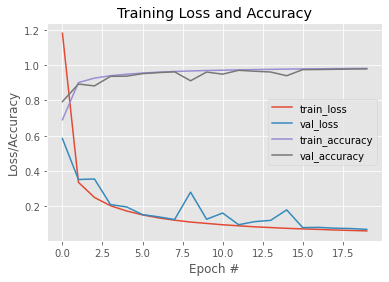

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()